<a href="https://colab.research.google.com/github/PedroAlves7/Elitismo/blob/main/DietaElitismo_ec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[772, 2176, 2176, 2176, 2176, 2176, 1966, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 1931, 2176, 2176, 2176, 2176, 2176, 1984, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 1898, 2176, 2176, 2176, 2176, 2176, 2033, 1951, 2176, 1984, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 1898, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2176, 2024, 2176, 2176, 2176, 1984, 2176, 2176, 2176, 2176, 2176, 2176]


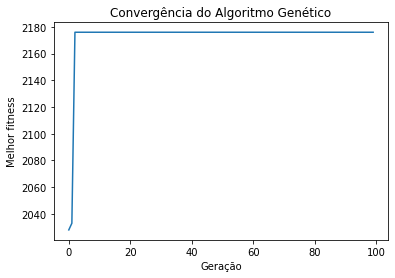

In [ ]:
import random
import matplotlib.pyplot as plt

# Definir os parâmetros do problema
ITENS = [(371, 77.9, 10, 1.3), (278, 0, 32, 15.5), (245, 0, 18.3, 18.5), (225, 4.2, 29.9, 9), (212, 0, 26.7, 10.9), (210, 0, 35.7, 6.4), (192, 0, 26.9, 8.5), (152, 19.6, 10.2, 6.8), (148, 4.6, 13.9, 7.8), (143, 1.6, 13, 8.9)]
MIN_PROT = 100
MIN_CARBO = 150
MIN_GORDURA = 50
MAX_PROT = 300
MAX_CARBO = 400
MAX_GORDURA = 100
TAM_POPULACAO = 50
TAXA_MUTACAO = 0.01
NUM_GERACOES = 100
ELIT = 0.1


#Criar listas para o gráfico de convergência
geracoes = []
melhores_fitnesses=[]

# Definir as funções de avaliação e cruzamento
def avaliar_individuo(individuo):
    # Avaliar a qualidade do indivíduo
    cal_total = sum([ITENS[i][0] * individuo[i] for i in range(len(individuo))])
    prot_total = sum([ITENS[i][1] * individuo[i] for i in range(len(individuo))])
    carbo_total = sum([ITENS[i][2] * individuo[i] for i in range(len(individuo))])
    gordura_total = sum([ITENS[i][3] * individuo[i] for i in range(len(individuo))])
    if (MIN_PROT < prot_total < MAX_PROT) and (MIN_CARBO < prot_total < MAX_CARBO) and (MIN_GORDURA < prot_total < MAX_GORDURA):
        cal_total = 0
    return cal_total

def cruzar_individuos(individuo1, individuo2):
    # Realizar o cruzamento dos indivíduos
    ponto_corte = random.randint(1, len(individuo1) - 1)
    filho1 = individuo1[:ponto_corte] + individuo2[ponto_corte:]
    filho2 = individuo2[:ponto_corte] + individuo1[ponto_corte:]
    return filho1, filho2

# Gerar a população inicial
populacao = []
for i in range(TAM_POPULACAO):
    individuo = [random.randint(0, 1) for i in range(len(ITENS))]
    populacao.append(individuo)

# Executar o algoritmo genético
for geracao in range(NUM_GERACOES):
#Variável geracao já inicializada no loop
#O Python permite que as variáveis sejam definidas em diferentes partes do código, como em loops, funções ou condicionais.
    # Avaliar a qualidade da população
    fitnesses = [avaliar_individuo(individuo) for individuo in populacao]
    sorted(populacao, key=avaliar_individuo, reverse=True)

    # Selecionar dois indivíduos aleatoriamente e cruzá-los
    nova_populacao = []
    for i in range(int(ELIT*TAM_POPULACAO)):
        nova_populacao.append(populacao[i])
        populacao.remove(populacao[i])
    for i in range(TAM_POPULACAO - int(ELIT*TAM_POPULACAO)):
        competidores = random.sample(populacao, 4) # Seleciona quatro individuos aleatoriamente
        vencedor = max(competidores, key=avaliar_individuo) # Seleciona o melhor individuo dentre os 4
        pai1 = vencedor
        competidores = random.sample(populacao, 4) # Seleciona quatro individuos aleatoriamente
        vencedor = max(competidores, key=avaliar_individuo) # Seleciona o melhor individuo dentre os 4
        pai2 = vencedor
        filho1, filho2 = cruzar_individuos(pai1, pai2)
        nova_populacao.append(filho1)
        nova_populacao.append(filho2)

    # Realizar a mutação na nova população
    for i in range(len(nova_populacao)):
        individuo = nova_populacao[i]
        for j in range(len(individuo)):
            if random.random() < TAXA_MUTACAO:
                individuo[j] = 1 - individuo[j]

    # Substituir a população anterior pela nova população
    populacao = nova_populacao
    # Imprimir a melhor solução encontrada até o momento
    melhor_individuo = max(populacao, key=avaliar_individuo)
    melhor_fitness = avaliar_individuo(melhor_individuo)
    geracoes = list(range(NUM_GERACOES))
    #geracoes.append(geracao)
    melhores_fitnesses.append(melhor_fitness)
    print(f"Melhor solução na geração {geracao}: {melhor_individuo} (fitness = {melhor_fitness})")

# Plotar o gráfico de convergência
print(geracoes)
plt.plot(geracoes, melhores_fitnesses)
plt.xlabel('Geração')
plt.ylabel('Melhor fitness')
plt.title('Convergência do Algoritmo Genético')
plt.show()